## Titanic3
- 생존자 예측 모델 개발을 위한 분석 셋

### 과제
: 타이타닉 생존자 예측모델 개발을 위한 전처리 및 통계적 시각적 탐색을 통하여 최적의 분석용 데이터셋을 작성하세요.

#### Titanic data 전처리
- 분석 데이터 : titanic3.csv
- 재사용 가능한 전처리 사용자 함수 작성 하여 전처리
    - Null 값 처리 : Age는 평균나이, 나머지 칼럼은 'N'값으로 변경
    - 불필요한 속성 칼럼 삭제
    - 문자열 칼럼 레이블 인코딩
- 통계적, 시각적 탐색을 통한 다양한 인사이트 도출
- 탐색적 분석을 통한 feature engineering, 파생변수 

#### 컬럼 정보

- survived : 생존여부(1: 생존, 0 : 사망)
- pclass : 승선권 클래스(1 : 1st, 2 : 2nd ,3 : 3rd)
- name : 승객 이름
- sex : 승객 성별
- age : 승객 나이
- sibsp : 동반한 형제자매, 배우자 수
- parch : 동반한 부모, 자식 수
- ticket : 티켓의 고유 넘버
- fare 티켓의 요금
- cabin : 객실 번호
- embarked : 승선한 항구명(C : Cherbourg, Q : Queenstown, S : Southampton)
- boat
- body
- home.dest

In [30]:
import warnings
warnings.filterwarnings('ignore')

import random
import numpy as np
from numpy import random as npr
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import rc
rc('font', family='Malgun Gothic')      #한글 폰트설정
plt.rcParams['axes.unicode_minus']=False      #마이너스 부호 출력 설정

In [31]:
df = pd.read_csv('../dataset/titanic3.csv',encoding='euc-kr')

# 분석용 데이터 셋
df.to_pickle('../dataset/tt3.pkl')
df = pd.read_pickle('../dataset/tt3.pkl')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [33]:
#### fare열 결측치 평균값으로 치환
df['fare'].replace(np.nan, df['fare'].mean(),inplace=True)

In [34]:
# body','ticket', 'home.dest','boat' 열 삭제
# family: sibsp + parch 동승한 가족들 수
df = df.drop(['body','ticket', 'home.dest','boat','name'], axis=1)
df['family'] = df['sibsp'] + df['parch']

In [35]:
#### 항구: 가장 많이 나온 값으로 변경
mvalue = df['embarked'].value_counts(dropna=True).idxmax()
df['embarked'].fillna(mvalue, inplace=True)

In [36]:
df.head()

,pclass,survived,sex,age,sibsp,parch,fare,cabin,embarked,family
0,1,1,female,29.00,0,0,211.3375,B5,S,0
1,1,1,male,0.92,1,2,151.5500,C22 C26,S,3
2,1,0,female,2.00,1,2,151.5500,C22 C26,S,3
3,1,0,male,30.00,1,2,151.5500,C22 C26,S,3
4,1,0,female,25.00,1,2,151.5500,C22 C26,S,3


In [37]:
#### 가격 범주화
def get_cate(fare):
    cat=''
    if fare<=15: cat='저가'
    elif fare<=60: cat='중가'
    elif fare<=200: cat='고가'
    else: cat='프리미엄'
    return cat

df['fare_cat']=df.fare.apply(lambda x: get_cate(x))
df.fare_cat.value_counts()

저가      673
중가      452
고가      146
프리미엄     38
Name: fare_cat, dtype: int64

In [38]:
#### age: nan값 처리
df['age'].replace(np.nan, 1000, inplace=True)

idx1 = df['age']==1000
bal=pd.DataFrame(df.age[idx1])
bal[::] = pd.DataFrame(np.random.randint(21,40,size=len(bal[::])))
df.age[idx1]=bal.age
df.age[idx1]

15      33.0
37      34.0
40      25.0
46      35.0
59      22.0
        ... 
1293    21.0
1297    31.0
1302    35.0
1303    31.0
1305    39.0
Name: age, Length: 263, dtype: float64

<AxesSubplot:ylabel='Frequency'>

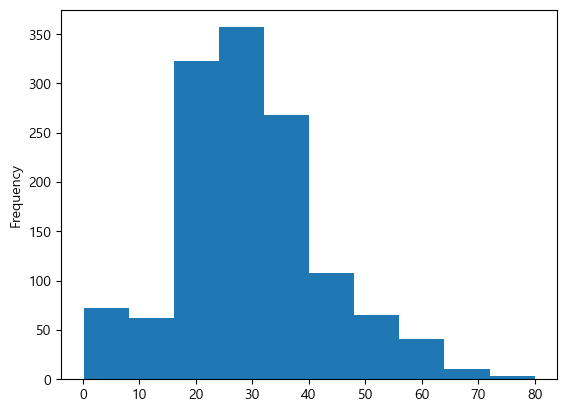

In [10]:
df.age.plot(kind='hist')

In [11]:
#### 나이 범주화
def get_age(age):
    cat = ''
    if age < 5: cat='Baby'
    elif age < 15: cat= 'Child'
    elif age < 21: cat= 'Young Adult'
    elif age < 49: cat='Adult'
    elif age < 70: cat='Old'
    else: cat = 'Elder'
    return cat

df['age_cat'] = df.age.apply(lambda x: get_age(x))

In [12]:
#### 객실 구역 나누기
df['cabin'].replace(np.nan, 'X', inplace=True)
idx1 = df['cabin'].str.contains('A')
idx2 = df['cabin'].str.contains('B')
idx3 = df['cabin'].str.contains('C')
idx4 = df['cabin'].str.contains('D')
idx5 = df['cabin'].str.contains('E')
idx6 = df['cabin'].str.contains('F')

df['cabin'][idx1] = 'A'
df['cabin'][idx2] = 'B'
df['cabin'][idx3] = 'C'
df['cabin'][idx4] = 'D'
df['cabin'][idx5] = 'E'
df['cabin'][idx6] = 'F'

In [13]:
df.head()

,pclass,survived,sex,age,sibsp,parch,fare,cabin,embarked,family,fare_cat,age_cat
0,1,1,female,29.00,0,0,211.3375,B,S,0,프리미엄,Adult
1,1,1,male,0.92,1,2,151.5500,C,S,3,고가,Baby
2,1,0,female,2.00,1,2,151.5500,C,S,3,고가,Baby
3,1,0,male,30.00,1,2,151.5500,C,S,3,고가,Adult
4,1,0,female,25.00,1,2,151.5500,C,S,3,고가,Adult


<AxesSubplot:xlabel='embarked', ylabel='survived'>

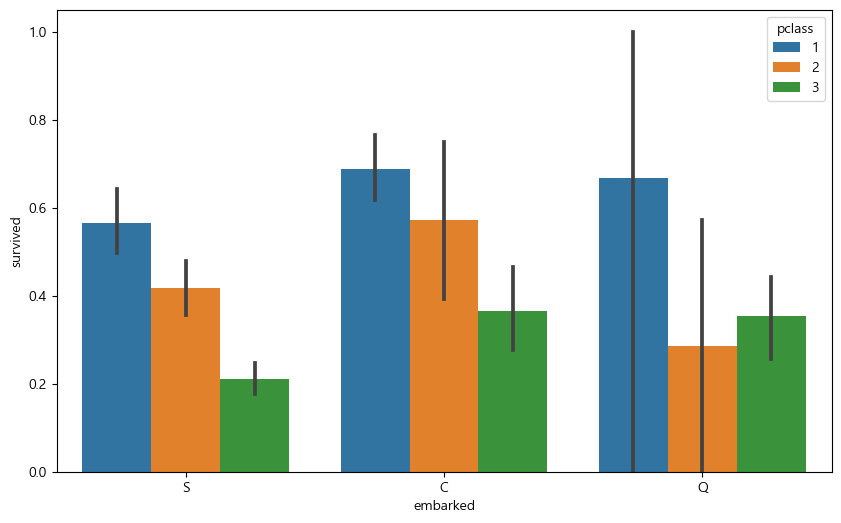

In [14]:
# 승선항
plt.figure(figsize=(10,6))
sns.barplot(x='embarked',y='survived',hue='pclass',data=df)

<AxesSubplot:xlabel='parch', ylabel='survived'>

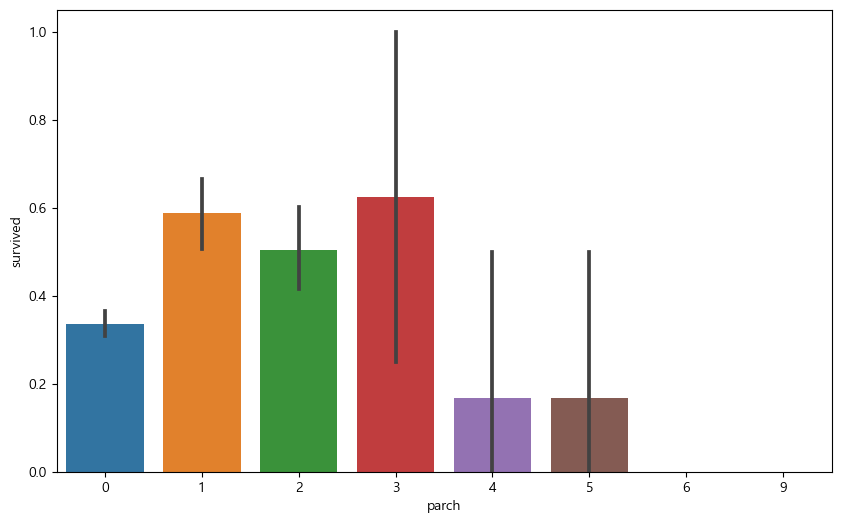

In [15]:
# 동승한 부모 도는 자녀 수
plt.figure(figsize=(10,6))
sns.barplot(x='parch',y='survived',data=df)

<AxesSubplot:xlabel='sibsp', ylabel='survived'>

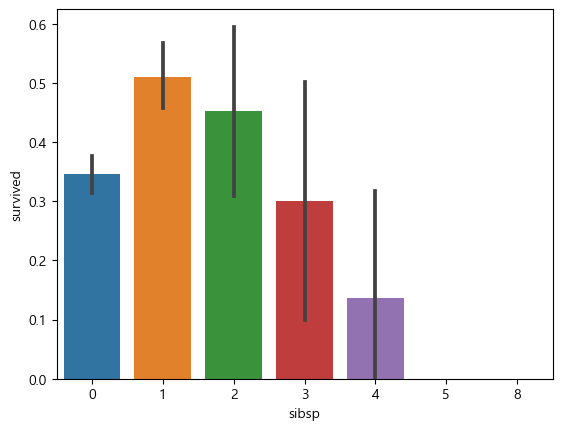

In [16]:
# 동승한 형제 또는 배우자 수
sns.barplot(x='sibsp',y='survived',data=df)

<AxesSubplot:xlabel='family', ylabel='survived'>

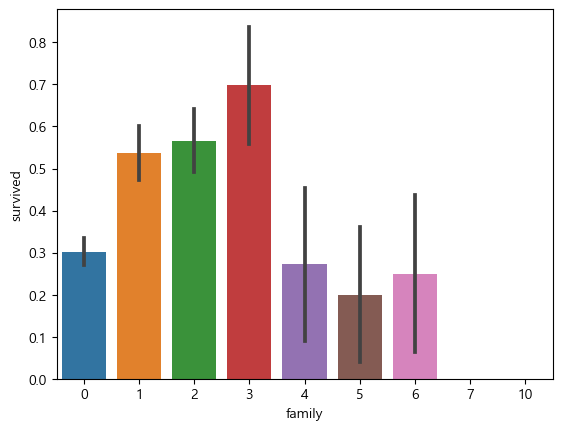

In [17]:
# 동승한 형제 또는 배우자 수
sns.barplot(x='family',y='survived',data=df)

<AxesSubplot:xlabel='fare_cat', ylabel='survived'>

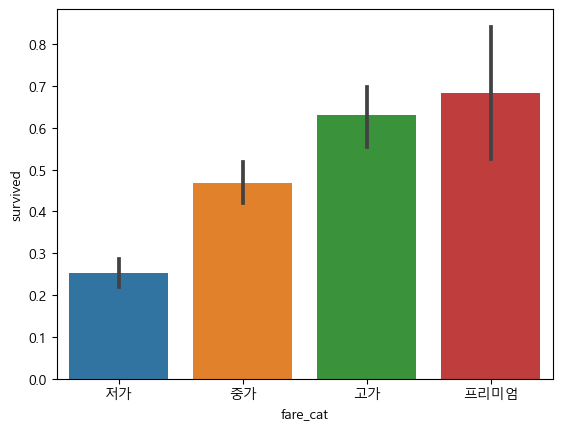

In [18]:
# 가격에 따른 생존률
order=['저가','중가','고가','프리미엄']
sns.barplot(x='fare_cat',y='survived', order=order, data=df)

In [19]:
df.corr()      #생존: 클래스(pclass)랑 요금(fare)이 연관관계 높음

,pclass,survived,age,sibsp,parch,fare,family
pclass,1.000000,-0.312469,-0.353490,0.060832,0.018322,-0.558477,0.050027
survived,-0.312469,1.000000,-0.050338,-0.027825,0.082660,0.244208,0.026876
age,-0.353490,-0.050338,1.000000,-0.189330,-0.120839,0.167981,-0.190580
sibsp,0.060832,-0.027825,-0.189330,1.000000,0.373587,0.160224,0.861952
parch,0.018322,0.082660,-0.120839,0.373587,1.000000,0.221522,0.792296
fare,-0.558477,0.244208,0.167981,0.160224,0.221522,1.000000,0.226465
family,0.050027,0.026876,-0.190580,0.861952,0.792296,0.226465,1.000000


<AxesSubplot:xlabel='fare_cat', ylabel='survived'>

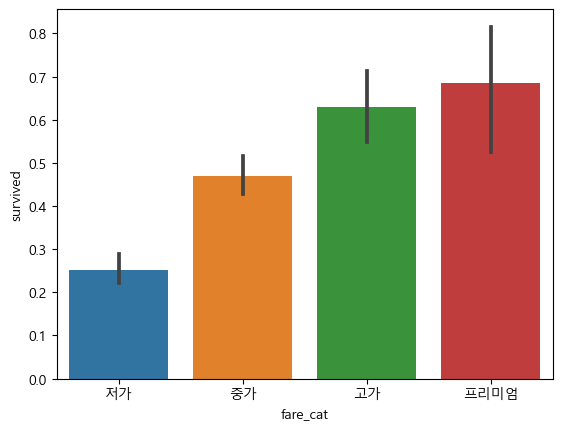

In [20]:
sns.barplot(x='fare_cat',y='survived', order=order, data=df)

In [21]:
#### 원핫 인코딩: 승선 항구
df = pd.get_dummies(df, columns=['embarked'])

#### 원핫 인코딩: 성별
df = pd.get_dummies(df, columns=['sex'])

#### 원핫 인코딩: 객실
df = pd.get_dummies(df, columns=['cabin'])

#### 원핫 인코딩: 요금 범주화
df = pd.get_dummies(df, columns=['fare_cat'])

#### 원핫 인코딩: 나이 범주화
df = pd.get_dummies(df, columns=['age_cat'])

In [22]:
df.drop(['age'], axis=1, inplace=True)
df.drop(['fare'], axis=1, inplace=True)

In [23]:
df

,pclass,survived,sibsp,parch,family,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,...,fare_cat_고가,fare_cat_저가,fare_cat_중가,fare_cat_프리미엄,age_cat_Adult,age_cat_Baby,age_cat_Child,age_cat_Elder,age_cat_Old,age_cat_Young Adult
0,1,1,0,0,0,0,0,1,1,0,...,0,0,0,1,1,0,0,0,0,0
1,1,1,1,2,3,0,0,1,0,1,...,1,0,0,0,0,1,0,0,0,0
2,1,0,1,2,3,0,0,1,1,0,...,1,0,0,0,0,1,0,0,0,0
3,1,0,1,2,3,0,0,1,0,1,...,1,0,0,0,1,0,0,0,0,0
4,1,0,1,2,3,0,0,1,1,0,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,1,0,1,1,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
1305,3,0,1,0,1,1,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
1306,3,0,0,0,0,1,0,0,0,1,...,0,1,0,0,1,0,0,0,0,0
1307,3,0,0,0,0,1,0,0,0,1,...,0,1,0,0,1,0,0,0,0,0


In [24]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# 독립변수, 종속변수 분리
y_t_df = df['survived'] # 종속변수
X_t_df = df.drop('survived', axis = 1) # 독립변수

# 독립변수 정규화
# X_t_df = preprocessing.StandardScaler().fit(X_t_df).transform(X_t_df)

# 학습용 데이터와 평가용 데이터를 8:2 혹은 7:3으로 분리
X_train, X_test, y_train, y_test = train_test_split(X_t_df, y_t_df, test_size = 0.2,
                                                   random_state = 11)

print(X_train.shape)
print(X_test.shape)

(1047, 28)
(262, 28)


In [25]:
# 모델 학습 및 평가
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, rf_pred).round(2)

lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
lr_pred = lr_model.predict(X_test)
accuracy_lr = accuracy_score(y_test,lr_pred).round(2)

print('rf 정확도:{}, lr 정확도:{}'.format(accuracy_rf,accuracy_lr))

rf 정확도:0.79, lr 정확도:0.82


In [ ]:
인사이트 찾기... 하나하나 시각화 다 해보기
파생변수 만들기, 결측치를 채워보는거 다 해보기
